In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [2]:
import dataloader
import utils
import cnnlstm
from utils import mae, rmse

import sys
import time
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import gc

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, RepeatVector
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten, TimeDistributed

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Model Data range
date = datetime.datetime(2021,3,12)
# Total entry count
count = 1200
# Training entry count
training_count = 1000
history_size = 30

%load_ext autoreload
%autoreload 2

# SONY

In [3]:
path = "../032721Comparison/Data/SONY2021.csv"
# Load data
train_x, train_y, test_x, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)

(1258, 7)
(1258, 7)
(1257, 7)
(1257, 7)
(1200, 7)
(970, 30, 1)
(200, 30, 1)


In [8]:
unit_params = range(30, 60, 5)
filter_params = [16]
kernel_params = [2, 4, 8]
best_config, best_err = cnnlstm.cnnlstm_model_selection(train_x, train_y, unit_params, filter_params, kernel_params)
print(best_config, best_err)

16 2 30 mean val RMSE: 0.020813977442089755
16 2 35 mean val RMSE: 0.024645233313984435
16 2 40 mean val RMSE: 0.020816143317830858
16 2 45 mean val RMSE: 0.02308548540115049
16 2 50 mean val RMSE: 0.01919642173509844
16 2 55 mean val RMSE: 0.01793570521043076
16 4 30 mean val RMSE: 0.023396151421211615
16 4 35 mean val RMSE: 0.020444809562555115
16 4 40 mean val RMSE: 0.022567782003804805
16 4 45 mean val RMSE: 0.02270281883410317
16 4 50 mean val RMSE: 0.026487502338805712
16 4 55 mean val RMSE: 0.02052137482172018
16 8 30 mean val RMSE: 0.024073406471322188
16 8 35 mean val RMSE: 0.02356367508873195
16 8 40 mean val RMSE: 0.02050811855444078
16 8 45 mean val RMSE: 0.023907881110118167
16 8 50 mean val RMSE: 0.022173140101747153
16 8 55 mean val RMSE: 0.02182411287062562
(16, 2, 55) 0.01793570521043076


In [4]:
unit_params = range(30, 60, 5)
filter_params = [2, 4, 8]
kernel_params = [2, 4, 8]
best_config, best_err = cnnlstm.cnnlstm_model_selection(train_x, train_y, unit_params, filter_params, kernel_params)
print(best_config, best_err)

2 2 30 mean val RMSE: 0.026679154742488508
2 2 35 mean val RMSE: 0.06965728059191134
2 2 40 mean val RMSE: 0.026732098248920394
2 2 45 mean val RMSE: 0.059502483462134347
2 2 50 mean val RMSE: 0.028030651792299695
2 2 55 mean val RMSE: 0.05179311477673134
2 4 30 mean val RMSE: 0.06209550302113957
2 4 35 mean val RMSE: 0.12129950501532819
2 4 40 mean val RMSE: 0.13328223386987104
2 4 45 mean val RMSE: 0.032967410109857716
2 4 50 mean val RMSE: 0.09347874466657477
2 4 55 mean val RMSE: 0.06253119970652982
2 8 30 mean val RMSE: 0.09430620160092154
2 8 35 mean val RMSE: 0.06502785902401506
2 8 40 mean val RMSE: 0.09389799552125577
2 8 45 mean val RMSE: 0.04574261746583711
2 8 50 mean val RMSE: 0.08878575771485823
2 8 55 mean val RMSE: 0.04635950698792982
4 2 30 mean val RMSE: 0.01900991588260918
4 2 35 mean val RMSE: 0.02516981667064332
4 2 40 mean val RMSE: 0.020430910463301737
4 2 45 mean val RMSE: 0.03293691697137106
4 2 50 mean val RMSE: 0.05948405253391507
4 2 55 mean val RMSE: 0.0235

In [5]:
model = None
gc.collect()

filter_size, kernel_size, unit_count = best_config

model = cnnlstm.cnnlstm_model(test_x, filter_size, kernel_size, unit_count)
model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)
print(model.summary())
y_hat = model.predict(test_x).transpose()[0]

del model
gc.collect()

Epoch 1/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 9.6422e-04
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 8.4646e-04
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 7.4520e-04
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 7.0374e-04
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 6.5937e-04
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 6.0399e-04
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 5.7464e-04
Epoch 10/100
31/31 [==============================] - 0s 4ms/step - loss: 4.8315e-04
Epoch 11/100
31/31 [==============================] - 0s 4ms/step - loss: 4.4270e-04
Epoch 12/100
31/31 [==============================] - 0s 4ms/step - loss: 3.6268e-

31/31 [==============================] - 0s 4ms/step - loss: 1.7706e-04
Epoch 98/100
31/31 [==============================] - 0s 4ms/step - loss: 1.6309e-04
Epoch 99/100
31/31 [==============================] - 0s 4ms/step - loss: 1.4064e-04
Epoch 100/100
31/31 [==============================] - 0s 4ms/step - loss: 1.3607e-04
Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_540 (Conv1D)          (None, 29, 8)             24        
_________________________________________________________________
conv1d_541 (Conv1D)          (None, 28, 8)             136       
_________________________________________________________________
max_pooling1d_270 (MaxPoolin (None, 14, 8)             0         
_________________________________________________________________
flatten_540 (Flatten)        (None, 112)               0         
______________________________________________________

20723

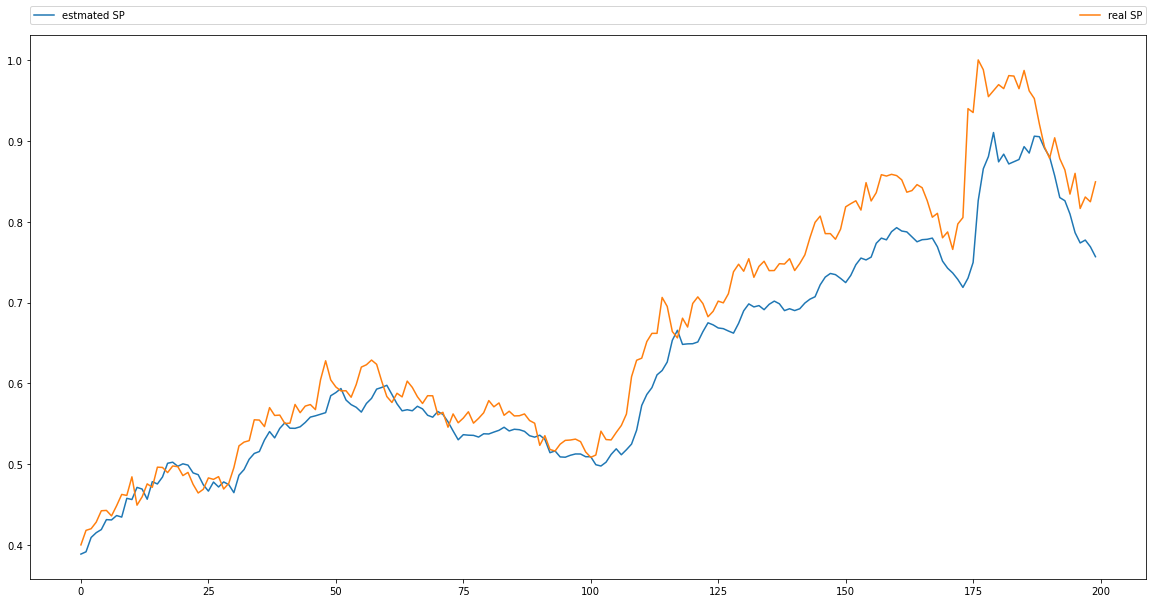

In [6]:
plt.plot(y_hat[:], label="estmated SP")
plt.plot(test_y[:], label="real SP")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [7]:
print("MAE:  ", mae(y_hat, test_y))
print("RMSE: ", rmse(y_hat, test_y))

MAE:   0.03893210099413106
RMSE:  0.05094668576077612
